# Flair Training Sequence Labeling Models

**(C) 2019-2020 by [Damir Cavar](http://damir.cavar.me/)**

**Version:** 0.3, February 2020

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

For the Flair tutorial 7 license and copyright restrictions, see the website below. For all the parts that I added, consider the license to be [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)).

Based on the [Flair Tutorial 7 Training a Model](https://github.com/zalandoresearch/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md).

This tutorial is using the CoNLL-03 Named Entity Recognition data set. See [this website](https://www.clips.uantwerpen.be/conll2003/ner/) for more details and to download an independent copy of the data set.

## Training a Sequence Labeling Model

We will need the following modules:

In [6]:
from flair.data import Corpus
from flair.datasets import WNUT_17
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

If you want to use the CoNLL-03 corpus, you need to download it and unpack it in your Flair data and model folder. This folder should be in your home-directory and it is named *.flair*. Once you have downloaded the corpus, unpack it into a folder *.flair/datasets/conll_03*. If you do not want to use the CoNLL-03 corpus, but rather [the free W-NUT 17 corpus](https://noisy-text.github.io/2017/emerging-rare-entities.html), you can use the Flair command: *WNUT_17()*

If you decide to download the CoNLL-03 corpus, adapt the following code. We load the W-NUT17 corpus and down-sample it to 10% of its size:

In [7]:
corpus: Corpus = WNUT_17().downsample(0.1)
print(corpus)

2020-02-03 08:33:26,978 Reading data from C:\Users\damir\.flair\datasets\wnut_17
2020-02-03 08:33:26,986 Train: C:\Users\damir\.flair\datasets\wnut_17\wnut17train.conll
2020-02-03 08:33:26,987 Dev: C:\Users\damir\.flair\datasets\wnut_17\emerging.dev.conll
2020-02-03 08:33:26,987 Test: C:\Users\damir\.flair\datasets\wnut_17\emerging.test.annotated
Corpus: 339 train + 101 dev + 129 test sentences


Declare the tag type to be predicted:

In [8]:
tag_type = 'ner'

Create the tag-dictionary for the tag-type:

In [10]:
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 28 tags: <unk>, O, S-person, B-location, E-location, S-corporation, B-product, E-product, S-location, B-person, E-person, I-product, I-location, S-group, S-product, B-creative-work, E-creative-work, B-group, E-group, S-creative-work, I-creative-work, B-corporation, I-corporation, E-corporation, I-person, I-group, <START>, <STOP>


Load the embeddings:

In [12]:
embedding_types: List[TokenEmbeddings] = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'),
    # FlairEmbeddings('news-backward'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

Load and initialize the sequence tagger:

In [13]:
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

Load and initialize the trainer:

In [14]:
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

If you have a GPU (otherwise maybe tweak the batch size, etc.), run the training with 150 epochs:

In [15]:
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

2020-02-03 08:51:41,233 ----------------------------------------------------------------------------------------------------
2020-02-03 08:51:41,238 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=28, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-02-03 08:51:41,239 ----------------------------------------------------------------------------------------------------
2020-02-03 08:51:41,239 Corpus: "Corpus: 339 train + 101 dev + 129 test sentences"
2020-02-03 08:51:41,239 ----------------------------------------------------------------------------------------------------
2020-02-03 08:51:41,239 Parameters:
2020-02-03 08:51:41,239  - learning_r

2020-02-03 08:52:24,708 epoch 5 - iter 11/11 - loss 6.25345958 - samples/sec: 99.31
2020-02-03 08:52:24,758 ----------------------------------------------------------------------------------------------------
2020-02-03 08:52:24,758 EPOCH 5 done: loss 6.2535 - lr 0.1000
2020-02-03 08:52:25,231 DEV : loss 6.468904495239258 - score 0.0
Epoch     5: reducing learning rate of group 0 to 5.0000e-02.
2020-02-03 08:52:25,241 BAD EPOCHS (no improvement): 4
2020-02-03 08:52:28,626 ----------------------------------------------------------------------------------------------------
2020-02-03 08:52:29,044 epoch 6 - iter 1/11 - loss 6.45317459 - samples/sec: 76.45
2020-02-03 08:52:29,616 epoch 6 - iter 2/11 - loss 6.89186525 - samples/sec: 61.35
2020-02-03 08:52:30,171 epoch 6 - iter 3/11 - loss 6.45178795 - samples/sec: 64.70
2020-02-03 08:52:30,797 epoch 6 - iter 4/11 - loss 7.05859566 - samples/sec: 55.81
2020-02-03 08:52:31,301 epoch 6 - iter 5/11 - loss 6.84184303 - samples/sec: 70.49
2020-02

2020-02-03 08:53:22,962 epoch 11 - iter 11/11 - loss 5.67733981 - samples/sec: 95.69
2020-02-03 08:53:23,022 ----------------------------------------------------------------------------------------------------
2020-02-03 08:53:23,022 EPOCH 11 done: loss 5.6773 - lr 0.0250
2020-02-03 08:53:23,473 DEV : loss 5.976884841918945 - score 0.022
2020-02-03 08:53:23,483 BAD EPOCHS (no improvement): 1
2020-02-03 08:53:27,031 ----------------------------------------------------------------------------------------------------
2020-02-03 08:53:27,445 epoch 12 - iter 1/11 - loss 6.23016548 - samples/sec: 77.43
2020-02-03 08:53:28,020 epoch 12 - iter 2/11 - loss 6.08264279 - samples/sec: 62.19
2020-02-03 08:53:28,559 epoch 12 - iter 3/11 - loss 5.78351816 - samples/sec: 66.86
2020-02-03 08:53:29,165 epoch 12 - iter 4/11 - loss 6.31968439 - samples/sec: 57.76
2020-02-03 08:53:29,668 epoch 12 - iter 5/11 - loss 6.21189957 - samples/sec: 72.28
2020-02-03 08:53:30,253 epoch 12 - iter 6/11 - loss 6.278245

2020-02-03 08:54:26,232 epoch 17 - iter 11/11 - loss 5.28244647 - samples/sec: 88.28
2020-02-03 08:54:26,293 ----------------------------------------------------------------------------------------------------
2020-02-03 08:54:26,293 EPOCH 17 done: loss 5.2824 - lr 0.0125
2020-02-03 08:54:26,754 DEV : loss 6.028558254241943 - score 0.022
2020-02-03 08:54:26,756 BAD EPOCHS (no improvement): 3
2020-02-03 08:54:30,291 ----------------------------------------------------------------------------------------------------
2020-02-03 08:54:30,693 epoch 18 - iter 1/11 - loss 3.43650746 - samples/sec: 79.48
2020-02-03 08:54:31,187 epoch 18 - iter 2/11 - loss 4.29816115 - samples/sec: 73.42
2020-02-03 08:54:31,731 epoch 18 - iter 3/11 - loss 4.98313848 - samples/sec: 66.18
2020-02-03 08:54:32,306 epoch 18 - iter 4/11 - loss 5.03285366 - samples/sec: 62.25
2020-02-03 08:54:32,850 epoch 18 - iter 5/11 - loss 4.83098359 - samples/sec: 66.20
2020-02-03 08:54:33,491 epoch 18 - iter 6/11 - loss 4.751970

2020-02-03 08:55:25,767 epoch 23 - iter 10/11 - loss 5.25138955 - samples/sec: 66.20
2020-02-03 08:55:26,210 epoch 23 - iter 11/11 - loss 5.33368171 - samples/sec: 85.47
2020-02-03 08:55:26,270 ----------------------------------------------------------------------------------------------------
2020-02-03 08:55:26,270 EPOCH 23 done: loss 5.3337 - lr 0.0031
2020-02-03 08:55:26,733 DEV : loss 5.914398670196533 - score 0.022
2020-02-03 08:55:26,743 BAD EPOCHS (no improvement): 1
2020-02-03 08:55:30,308 ----------------------------------------------------------------------------------------------------
2020-02-03 08:55:30,732 epoch 24 - iter 1/11 - loss 3.21351695 - samples/sec: 75.60
2020-02-03 08:55:31,296 epoch 24 - iter 2/11 - loss 3.56172764 - samples/sec: 62.01
2020-02-03 08:55:31,911 epoch 24 - iter 3/11 - loss 4.16734831 - samples/sec: 57.66
2020-02-03 08:55:32,547 epoch 24 - iter 4/11 - loss 5.46593624 - samples/sec: 56.42
2020-02-03 08:55:33,214 epoch 24 - iter 5/11 - loss 5.46387

2020-02-03 08:56:26,447 epoch 29 - iter 10/11 - loss 5.36485059 - samples/sec: 68.74
2020-02-03 08:56:26,868 epoch 29 - iter 11/11 - loss 5.18434910 - samples/sec: 88.75
2020-02-03 08:56:26,920 ----------------------------------------------------------------------------------------------------
2020-02-03 08:56:26,928 EPOCH 29 done: loss 5.1843 - lr 0.0016
2020-02-03 08:56:27,404 DEV : loss 5.896324157714844 - score 0.022
2020-02-03 08:56:27,412 BAD EPOCHS (no improvement): 3
2020-02-03 08:56:30,931 ----------------------------------------------------------------------------------------------------
2020-02-03 08:56:31,385 epoch 30 - iter 1/11 - loss 3.89359999 - samples/sec: 71.80
2020-02-03 08:56:32,010 epoch 30 - iter 2/11 - loss 3.92497885 - samples/sec: 56.69
2020-02-03 08:56:32,574 epoch 30 - iter 3/11 - loss 4.26560346 - samples/sec: 63.55
2020-02-03 08:56:33,107 epoch 30 - iter 4/11 - loss 4.58838278 - samples/sec: 67.59
2020-02-03 08:56:33,670 epoch 30 - iter 5/11 - loss 4.64010

2020-02-03 08:57:27,334 epoch 35 - iter 9/11 - loss 5.57323922 - samples/sec: 53.83
2020-02-03 08:57:27,969 epoch 35 - iter 10/11 - loss 5.40601563 - samples/sec: 56.66
2020-02-03 08:57:28,421 epoch 35 - iter 11/11 - loss 5.18469550 - samples/sec: 83.98
2020-02-03 08:57:28,494 ----------------------------------------------------------------------------------------------------
2020-02-03 08:57:28,494 EPOCH 35 done: loss 5.1847 - lr 0.0004
2020-02-03 08:57:29,046 DEV : loss 5.883790016174316 - score 0.022
2020-02-03 08:57:29,054 BAD EPOCHS (no improvement): 1
2020-02-03 08:57:32,841 ----------------------------------------------------------------------------------------------------
2020-02-03 08:57:33,325 epoch 36 - iter 1/11 - loss 7.34654999 - samples/sec: 66.11
2020-02-03 08:57:33,987 epoch 36 - iter 2/11 - loss 6.89498997 - samples/sec: 54.08
2020-02-03 08:57:34,621 epoch 36 - iter 3/11 - loss 5.62297106 - samples/sec: 56.84
2020-02-03 08:57:35,175 epoch 36 - iter 4/11 - loss 5.73646

2020-02-03 08:58:30,400 epoch 41 - iter 9/11 - loss 5.30810801 - samples/sec: 55.66
2020-02-03 08:58:31,045 epoch 41 - iter 10/11 - loss 5.24546852 - samples/sec: 54.73
2020-02-03 08:58:31,509 epoch 41 - iter 11/11 - loss 5.16899443 - samples/sec: 79.23
2020-02-03 08:58:31,578 ----------------------------------------------------------------------------------------------------
2020-02-03 08:58:31,580 EPOCH 41 done: loss 5.1690 - lr 0.0002
2020-02-03 08:58:32,115 DEV : loss 5.881915092468262 - score 0.022
2020-02-03 08:58:32,125 BAD EPOCHS (no improvement): 3
2020-02-03 08:58:35,769 ----------------------------------------------------------------------------------------------------
2020-02-03 08:58:36,195 epoch 42 - iter 1/11 - loss 5.13844013 - samples/sec: 75.14
2020-02-03 08:58:36,799 epoch 42 - iter 2/11 - loss 4.58374739 - samples/sec: 58.84
2020-02-03 08:58:37,333 epoch 42 - iter 3/11 - loss 4.94820595 - samples/sec: 69.02
2020-02-03 08:58:38,009 epoch 42 - iter 4/11 - loss 5.06684

{'test_score': 0.0198,
 'dev_score_history': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022,
  0.022],
 'train_loss_history': [19.64247400110418,
  7.3237409158186475,
  6.647785360162908,
  6.274353677576238,
  6.253459583629262,
  6.0311057567596436,
  5.829011396928267,
  5.599017815156416,
  5.606011629104614,
  5.485666448419744,
  5.677339813926003,
  5.509015993638472,
  5.371448170055043,
  5.417202407663519,
  5.572993430224332,
  5.156284202228893,
  5.282446471127597,
  5.409523942253807,
  5.422696980563077,
  5.130376208912242,
  5.2385149652307685,
  5.317819421941584,
  5.333681713451039,
  5.252829486673528,
  5.352623267607256,
  5.307583288712935,
  5.209459673274647,
  5

Plot the training curves and results:

2020-02-03 09:00:03,963 ----------------------------------------------------------------------------------------------------
2020-02-03 09:00:03,964 WARNING: No LOSS found for test split in this data.
2020-02-03 09:00:03,964 Are you sure you want to plot LOSS and not another value?
2020-02-03 09:00:03,965 ----------------------------------------------------------------------------------------------------
2020-02-03 09:00:03,987 ----------------------------------------------------------------------------------------------------
2020-02-03 09:00:03,988 WARNING: No F1 found for test split in this data.
2020-02-03 09:00:03,989 Are you sure you want to plot F1 and not another value?
2020-02-03 09:00:03,990 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in resources\taggers\example-ner\training.png


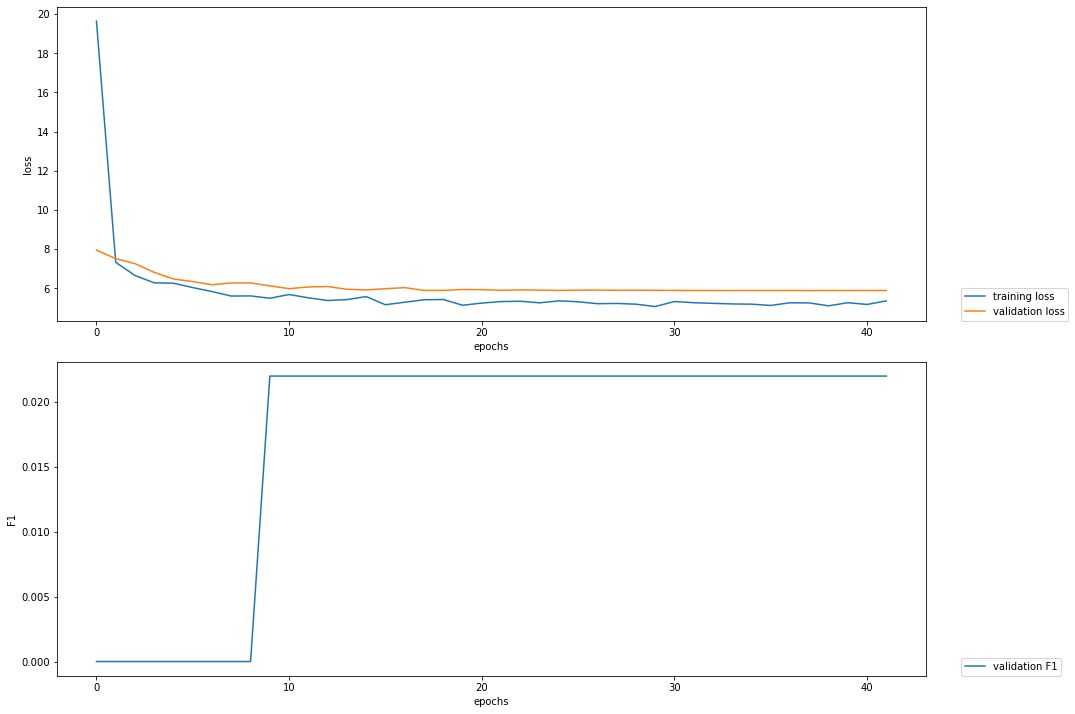

Weights plots are saved in resources\taggers\example-ner\weights.png


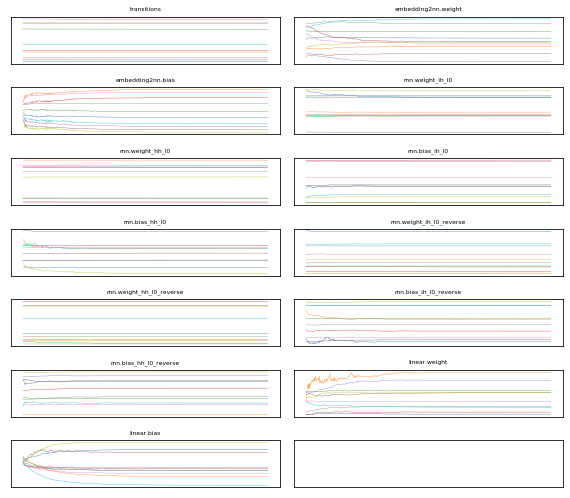

In [17]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('resources/taggers/example-ner/loss.tsv')
plotter.plot_weights('resources/taggers/example-ner/weights.txt')

Use the model via the *predict* method:

In [25]:
from flair.data import Sentence
model = SequenceTagger.load('resources/taggers/example-ner/final-model.pt')
sentence = Sentence('John lives in the Empire State Building .')
model.predict(sentence)
print(sentence.to_tagged_string())

2020-02-03 09:08:37,099 loading file resources/taggers/example-ner/final-model.pt
John lives in the Empire State Building .
